# ---Coronavirus---

Data taken from Johns Hopkins Covid Repository https://github.com/CSSEGISandData/COVID-19

Joined with population data from The World Bank https://data.worldbank.org/indicator/SP.POP.TOTL

Missing data filled in with Wikipedia population data http://wikipedia.org

Code and data can be found at https://github.com/Renaissanc3Man/Coronavirus

-------------------------------------------------------------------------------------------------

#### US Data Notebook: https://rb.gy/zm4edi
#### World Data Notebook: https://rb.gy/rtvi9r

In [1]:
import sys
sys.path.append(".")
sys.path.append(r'C:\__YOUTUBE__\__POLITICS__\Coronavirus')
from corona_library import *
from IPython.display import Image

myfile = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\coronavirus_world.csv'
last_update_time = get_time_of_file_update(myfile)
country_df = pd.read_csv(myfile,low_memory=False)

print('Data Last Updated: ' + last_update_time.strftime('%m-%d-%Y %I:%m %p'))

Data Last Updated: 09-24-2020 12:09 PM


In [2]:
#import
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#Jupyter setup
init_notebook_mode(connected=True)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
worst_countries_df = country_df.copy()
worst_countries_df = worst_countries_df[worst_countries_df['Date'] == worst_countries_df['Date'].max()]
worst_countries_df = worst_countries_df[worst_countries_df['Population'] > 1000000.0]
worst_countries_df = safe_reset_index(worst_countries_df.sort_values(['Deaths_Per_Population'],ascending=False))
worst_countries_df = worst_countries_df[['Country_Region','Population','Deaths_Per_Population','Confirmed_Per_Population','Deaths','Confirmed']]
print(worst_countries_df.head(15))
print(list(worst_countries_df.head(15)['Country_Region']))

   Country_Region   Population  Deaths_Per_Population  \
0      US Only NJ    8882000.0               0.001811   
1   US Only NY NJ   28332000.0               0.001736   
2      US Only NY   19450000.0               0.001701   
3            Peru   32510450.0               0.000971   
4         Belgium   11484060.0               0.000867   
5         Bolivia   11513100.0               0.000671   
6           Spain   47076780.0               0.000659   
7          Brazil  211049530.0               0.000654   
8           Chile   18952040.0               0.000651   
9         Ecuador   17373660.0               0.000643   
10     US Only FL   21480000.0               0.000634   
11             UK   66834400.0               0.000628   
12             US  328239520.0               0.000613   
13          Italy   60297400.0               0.000593   
14         Mexico  127575530.0               0.000587   

    Confirmed_Per_Population    Deaths  Confirmed  
0                   0.022629   1608

In [4]:
#reduce data to only worst hit states
countries_list = [#'US Only NY NJ',
                  'Denmark',
                  'Norway',
                  'Sweden',
                  'Finland',
                  'Iceland',
                  'Greenland',
]
country_df = country_df[country_df['Country_Region'].isin(countries_list)]
#countries_list = sorted(list(country_df['Country_Region'].unique()))

colors_dict = dict(zip(countries_list,[
                #'purple',
                'brown',
                'blue',
                'grey',
                'yellow',
                'green',
                'red'
                
]))


#holdover from US notebook
rename_dict = dict(zip(countries_list,countries_list))

country_df['Date_temp'] = pd.to_datetime(country_df['Date'])
country_df = country_df[country_df['Date_temp']>=np.datetime64('2020-04-12')]

In [5]:
countries_list

['Denmark', 'Norway', 'Sweden', 'Finland', 'Iceland', 'Greenland']

Static Image:


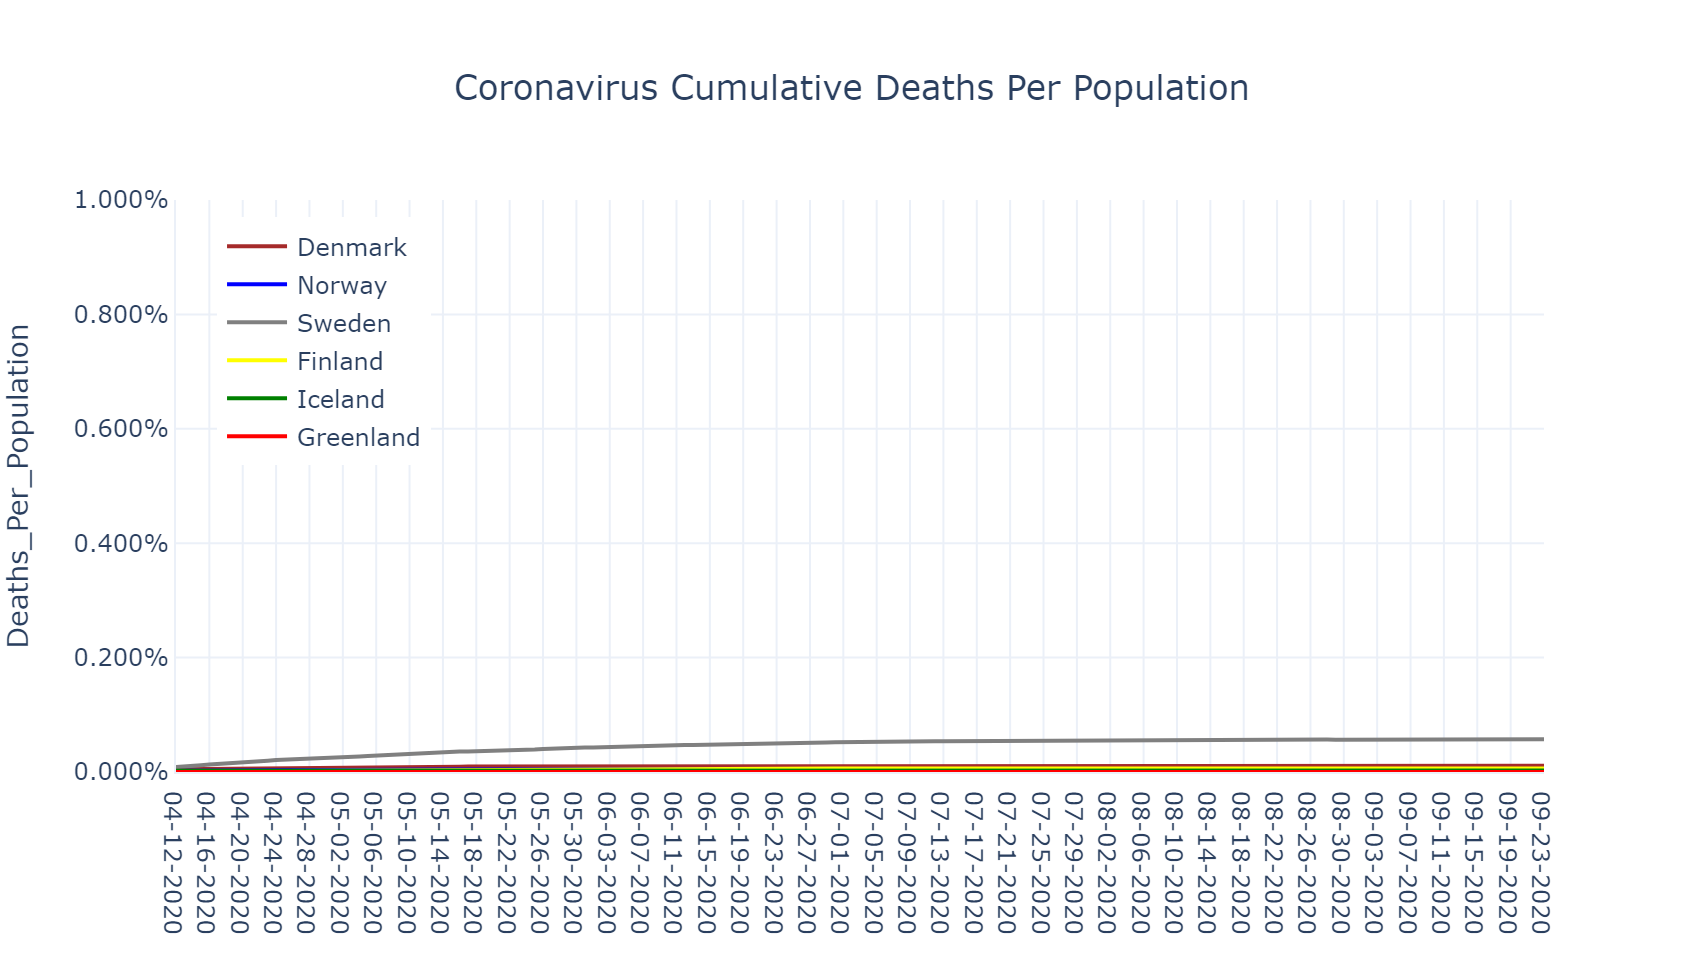

In [28]:
data = []
for mycountry in countries_list:
    data.append(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Deaths_Per_Population'],
                               name = rename_dict[mycountry],
                               line = {'color':colors_dict[mycountry]}))
layout = go.Layout(
                showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Cumulative Deaths Per Population',
                title_x= 0.5,
                yaxis={'title':'Deaths_Per_Population',
                       'range':[0,0.01],
                       'tickformat':'.3%',
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig = go.Figure(data=data,layout=layout)
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\1-CV_Cum_Deaths_Per_Population.png'
fig.write_image(myfilename,width = 852,height = 480, scale = 2.0)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


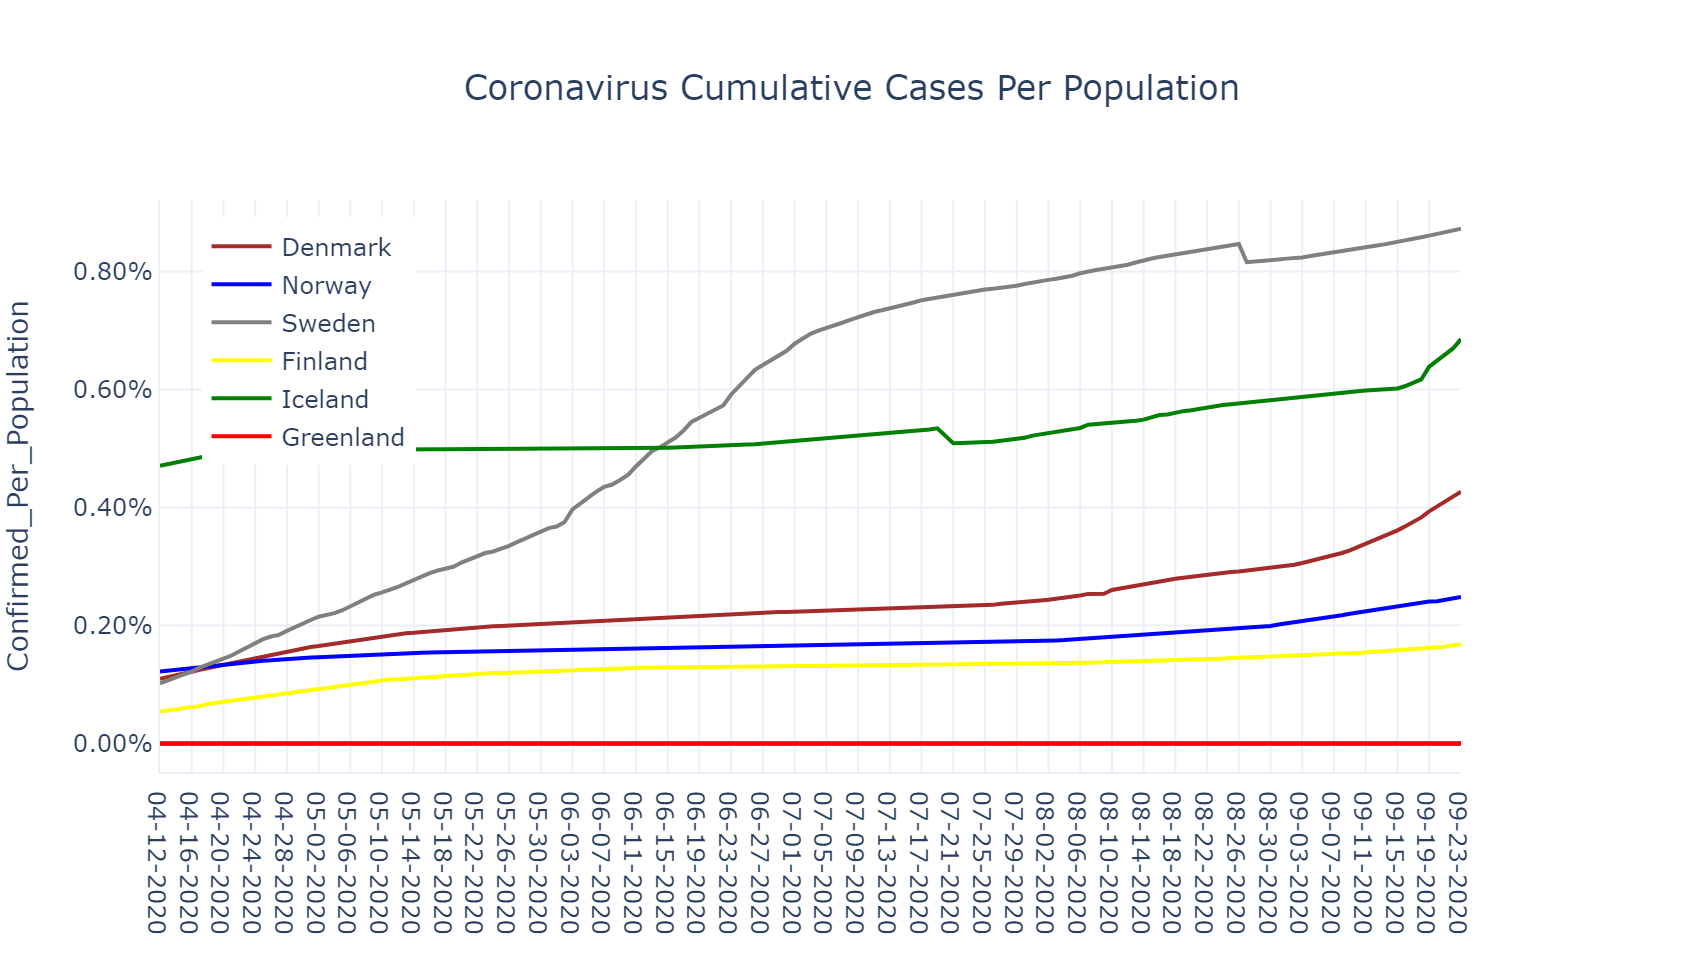

In [7]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
for mycountry in countries_list:
    fig.add_trace(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Confirmed_Per_Population'],
                               name = rename_dict[mycountry],
                               line = {'color':colors_dict[mycountry]}),
                  secondary_y = False)

fig.update_layout(showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Cumulative Cases Per Population',
                title_x=0.5,
                yaxis={'title':'Confirmed_Per_Population',
                       'tickformat':'.2%',
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template = 'plotly_white')

fig.update_yaxes(title_text='People_Tested_Per_Population',secondary_y=True,tickformat='.1%')
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\2-CV_Cum_Cases_Per_Population.png'
fig.write_image(myfilename,width = 852,height = 480, scale = 2.0)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


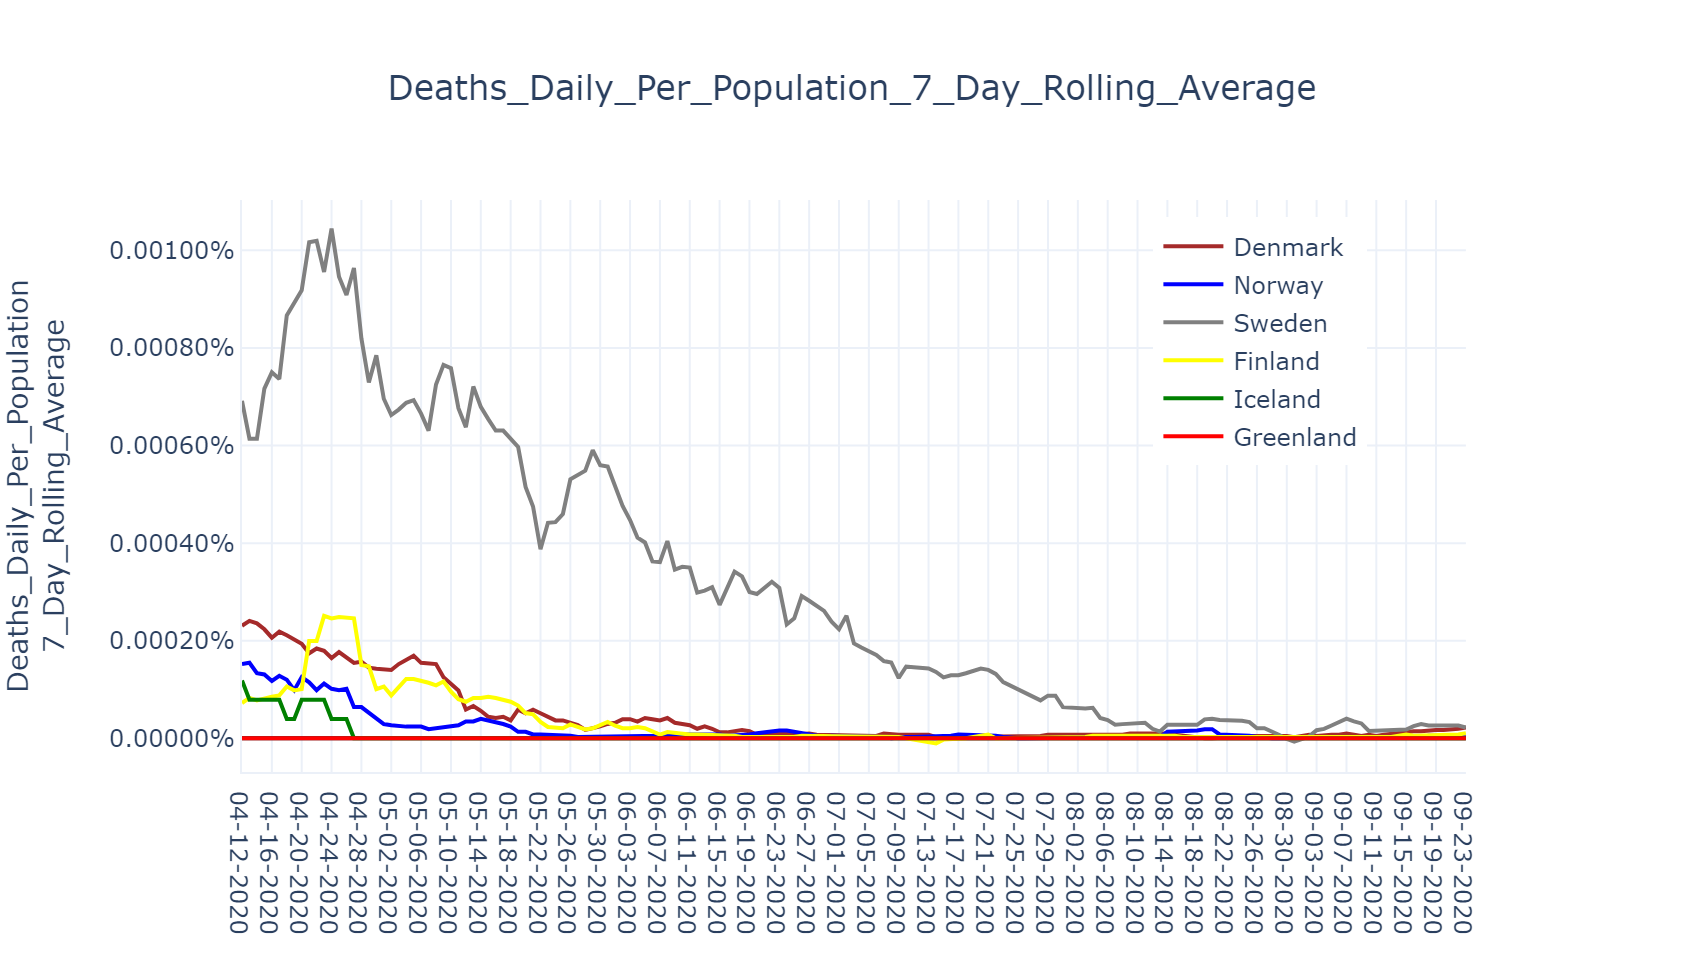

In [27]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
for mycountry in countries_list:
    fig.add_trace(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Deaths_Daily_Per_Population_7_Day_Rolling_Average'],
                               name = rename_dict[mycountry],
                               line = {'color':colors_dict[mycountry]}),
                  secondary_y = False)

fig.update_layout(showlegend = True,
                #legend= {'x':0.09,'y':0.97,'bgcolor':'rgba(0,0,0,0)'},
                legend = {'x':0.7,'y':0.97},
                title='Deaths_Daily_Per_Population_7_Day_Rolling_Average',
                title_x=0.5,
                #margin = {'r':55},
                yaxis={'title':'Deaths_Daily_Per_Population<br>7_Day_Rolling_Average',
                       'tickformat':'.5%',
                       #'range': [0.0,0.000035],
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template = 'plotly_white')

#fig.update_yaxes(title_text='People_Tested_Daily_Per_Population<br>7_Day_Rolling_Average',
#                 secondary_y=True,tickformat='.1%')
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\3-CV_Deaths_Per_Pop_7DAVG.png'
fig.write_image(myfilename,width = 852,height = 480, scale = 2.0)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


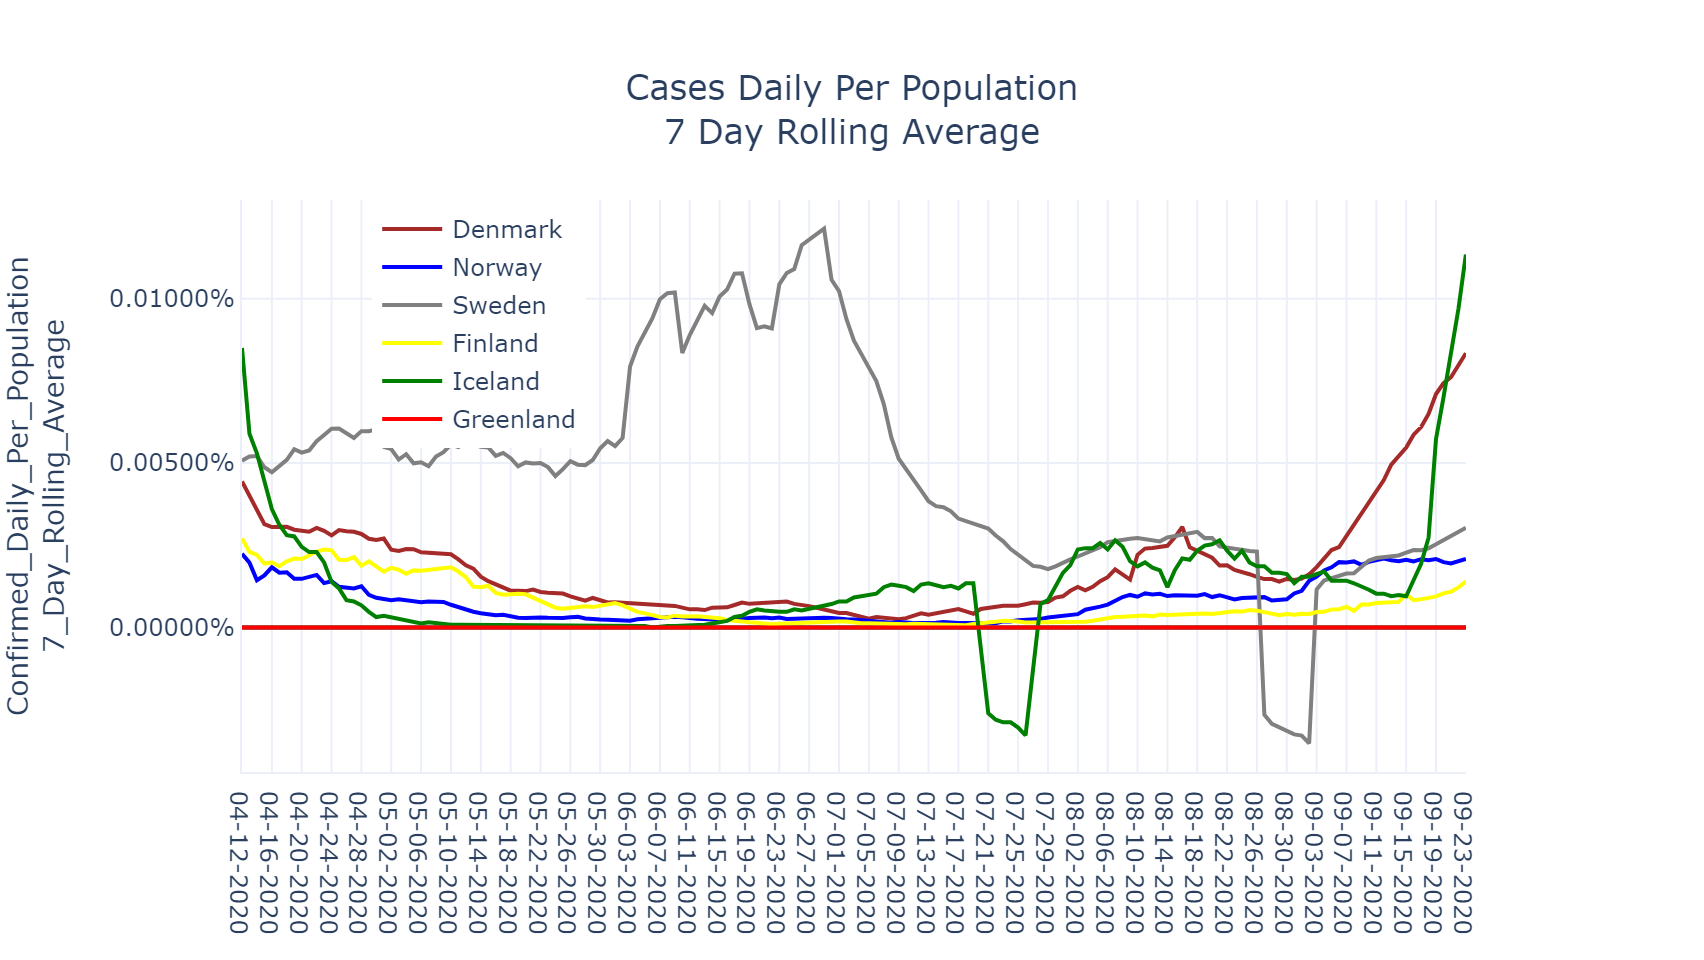

In [26]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
for mycountry in countries_list:
    fig.add_trace(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Confirmed_Daily_Per_Population_7_Day_Rolling_Average'],
                               name = rename_dict[mycountry],
                               line = {'color':colors_dict[mycountry]}),
                  secondary_y = False)

fig.update_layout(showlegend = True,
                #legend= {'x':0.09,'y':0.97,'bgcolor':'rgba(0,0,0,0)'},
                legend = {'x':0.1,'y':1.0},
                title='Cases Daily Per Population<br>7 Day Rolling Average',
                title_x=0.5,
                #margin = {'r':55},
                yaxis={'title':'Confirmed_Daily_Per_Population<br>7_Day_Rolling_Average',
                       'tickformat':'.5%',
                       #'range': [0.0,0.000035],
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template = 'plotly_white')
#fig.update_layout(annotations = [{'x':'06-25-2020',
#                                 'y':0.0000275,
#                                 'xref':'x','yref':'y',
#                                 'showarrow':True,'arrowhead':7,'ax':85,'ay':0,
#                                 'text':r'NJ<br>(Probable Confirmed Added)'}])
fig.update_yaxes(title_text='People_Tested_Daily_Per_Population<br>7_Day_Rolling_Average',
                 secondary_y=True,tickformat='.1%')
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\4-CV_Cases_Per_Pop_7DAVG.png'
fig.write_image(myfilename,width = 852,height = 480, scale = 2.0)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


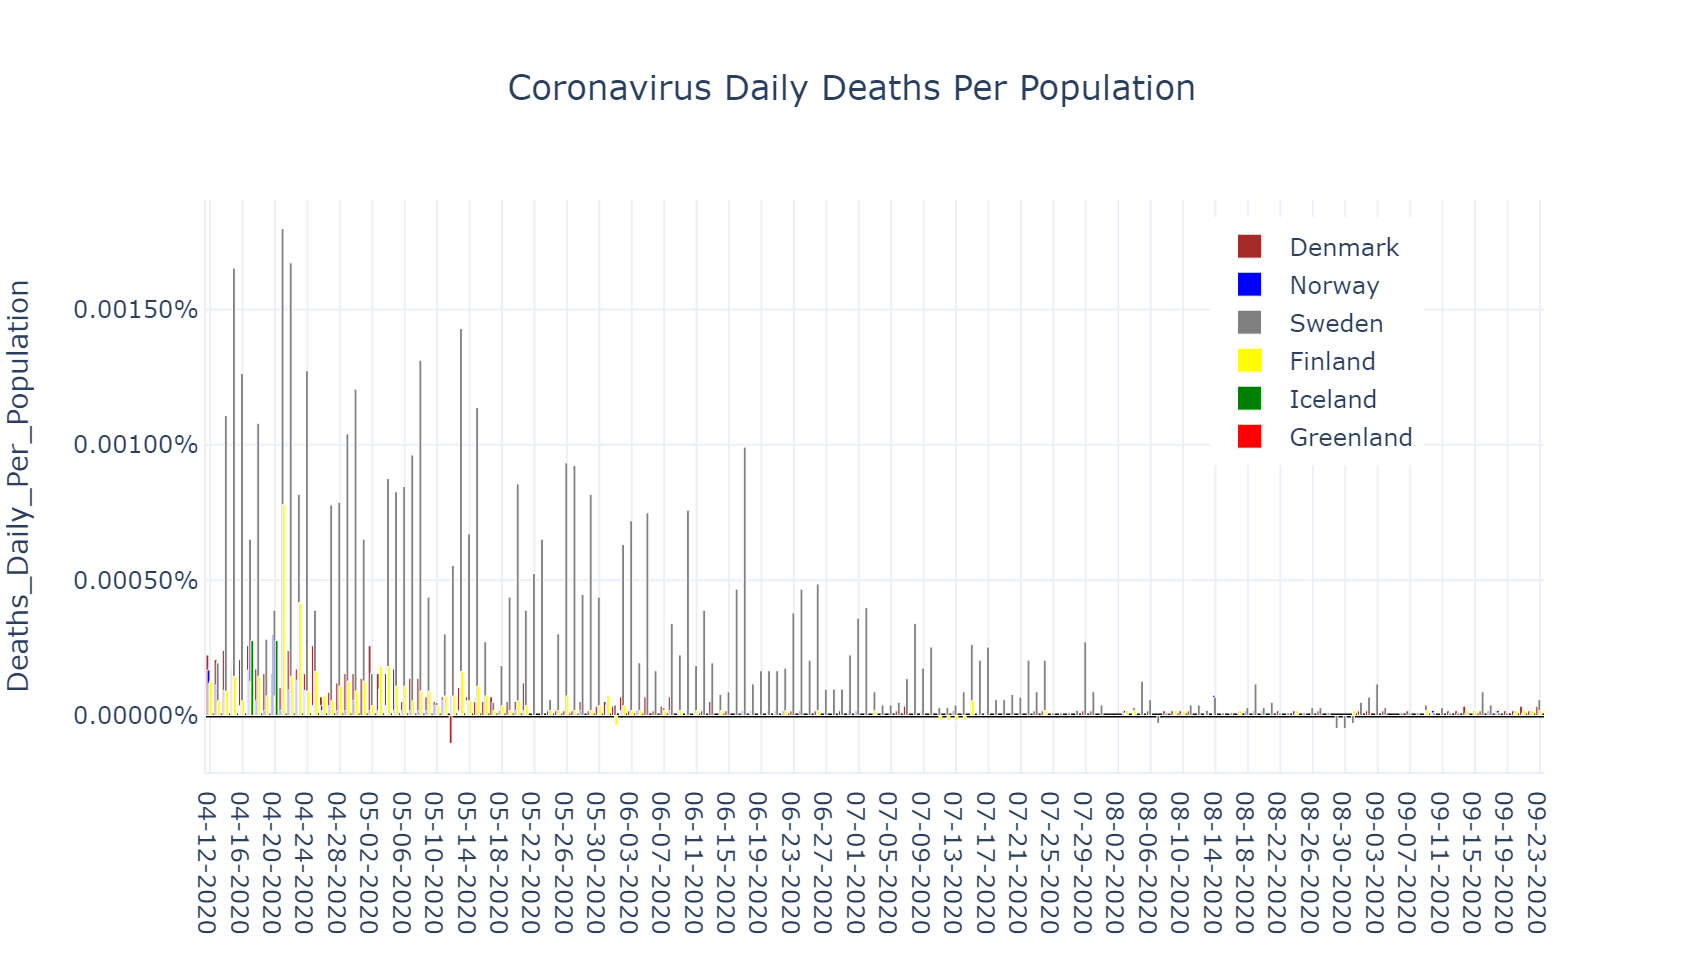

In [24]:
data = []
for mycountry in countries_list:
    data.append(go.Bar(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Deaths_Daily_Per_Population'],
                               name = rename_dict[mycountry],
                               marker = {'color':colors_dict[mycountry]},width = 0.35))
layout = go.Layout(showlegend = True,
                legend= dict(x=0.75,y=0.97),
                title='Coronavirus Daily Deaths Per Population',
                title_x= 0.5,
                yaxis={'title':'Deaths_Daily_Per_Population',
                       'tickformat':'.5%',
                       #'range': [0.0,0.000085],
                      'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig = go.Figure(data=data,layout=layout)

iplot(fig)
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\5-CV_Daily_Deaths_Per_Population.png'
fig.write_image(myfilename,width = 852,height = 480, scale = 2.0)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


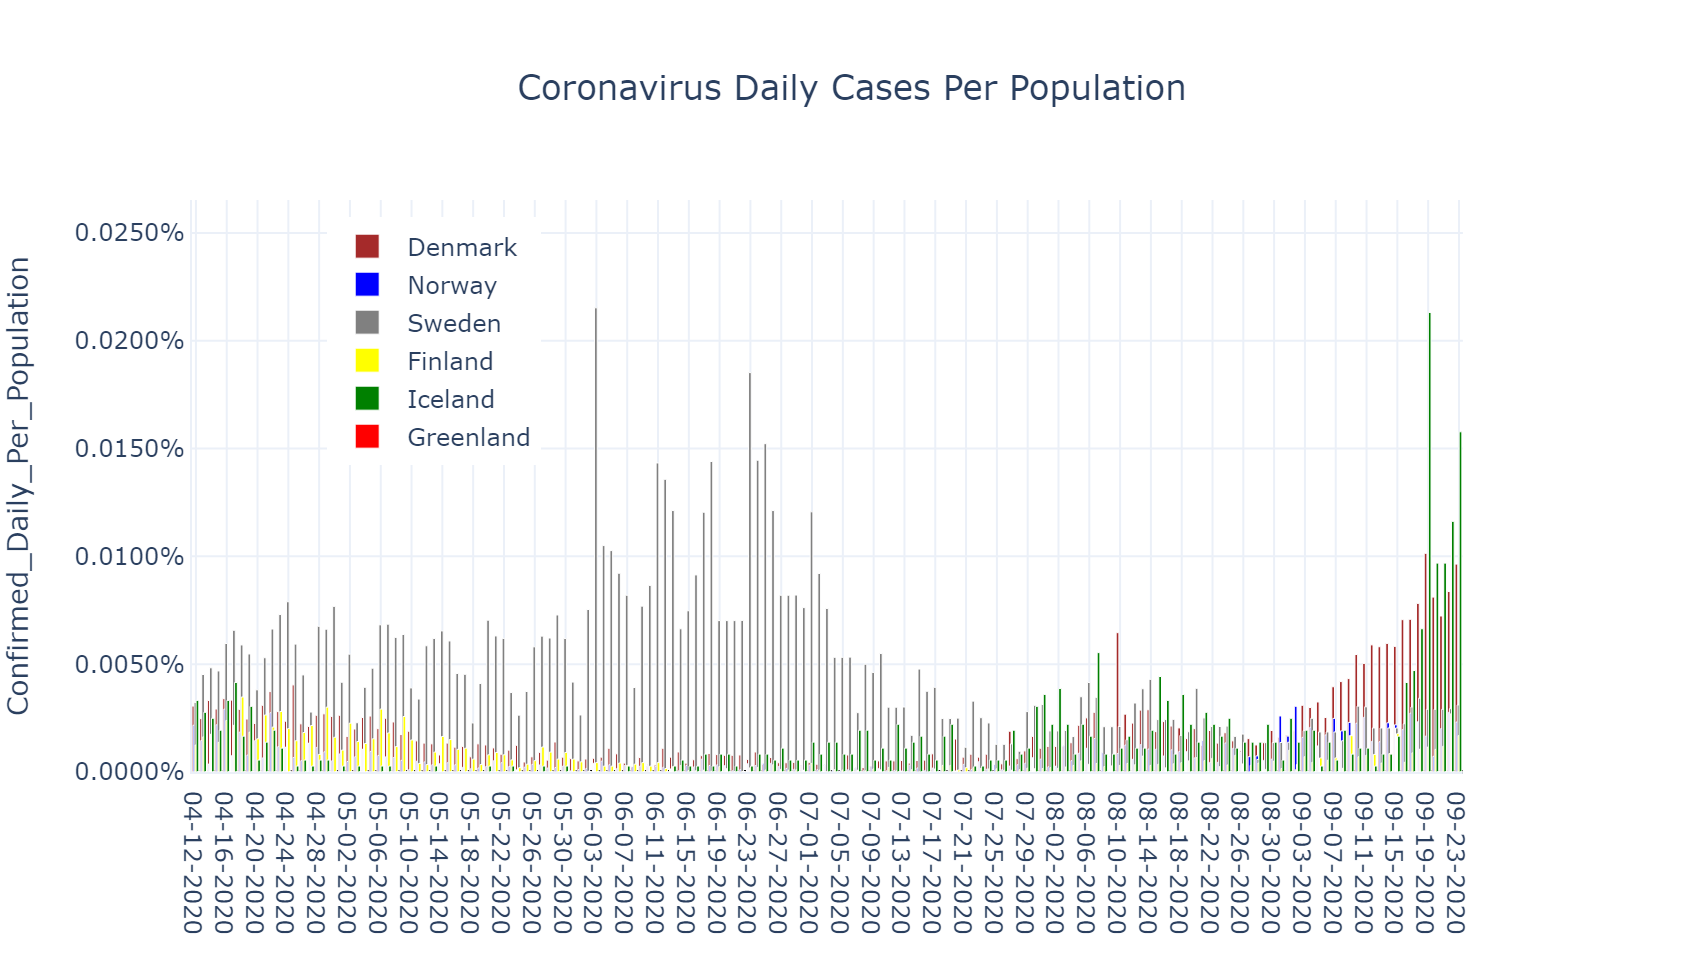

In [21]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
for mycountry in countries_list:
    fig.add_trace(go.Bar(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Confirmed_Daily_Per_Population'],
                               name = rename_dict[mycountry],
                               marker = {'color':colors_dict[mycountry]},
                               width = 0.35),
                  secondary_y = False)

fig.update_layout(showlegend = True,
                legend= dict(x=0.1,y=0.97),
                title='Coronavirus Daily Cases Per Population',
                title_x= 0.5,
                yaxis={'title':'Confirmed_Daily_Per_Population',
                       'range': [0.0,country_df['Confirmed_Daily_Per_Population'].max()+0.00005],
                       'tickformat':'.4%',
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig.update_yaxes(title_text='People_Tested_Daily_Per_Population<br>7_Day_Rolling_Average',
                 secondary_y=True,
                 tickformat= '.3%')
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\6-CV_Daily_Cases_Per_Population.png'
fig.write_image(myfilename,width = 852,height = 480, scale = 2.0)
print('Static Image:')
Image(filename=myfilename) 

In [12]:
#countries_list.remove("US")

Static Image:


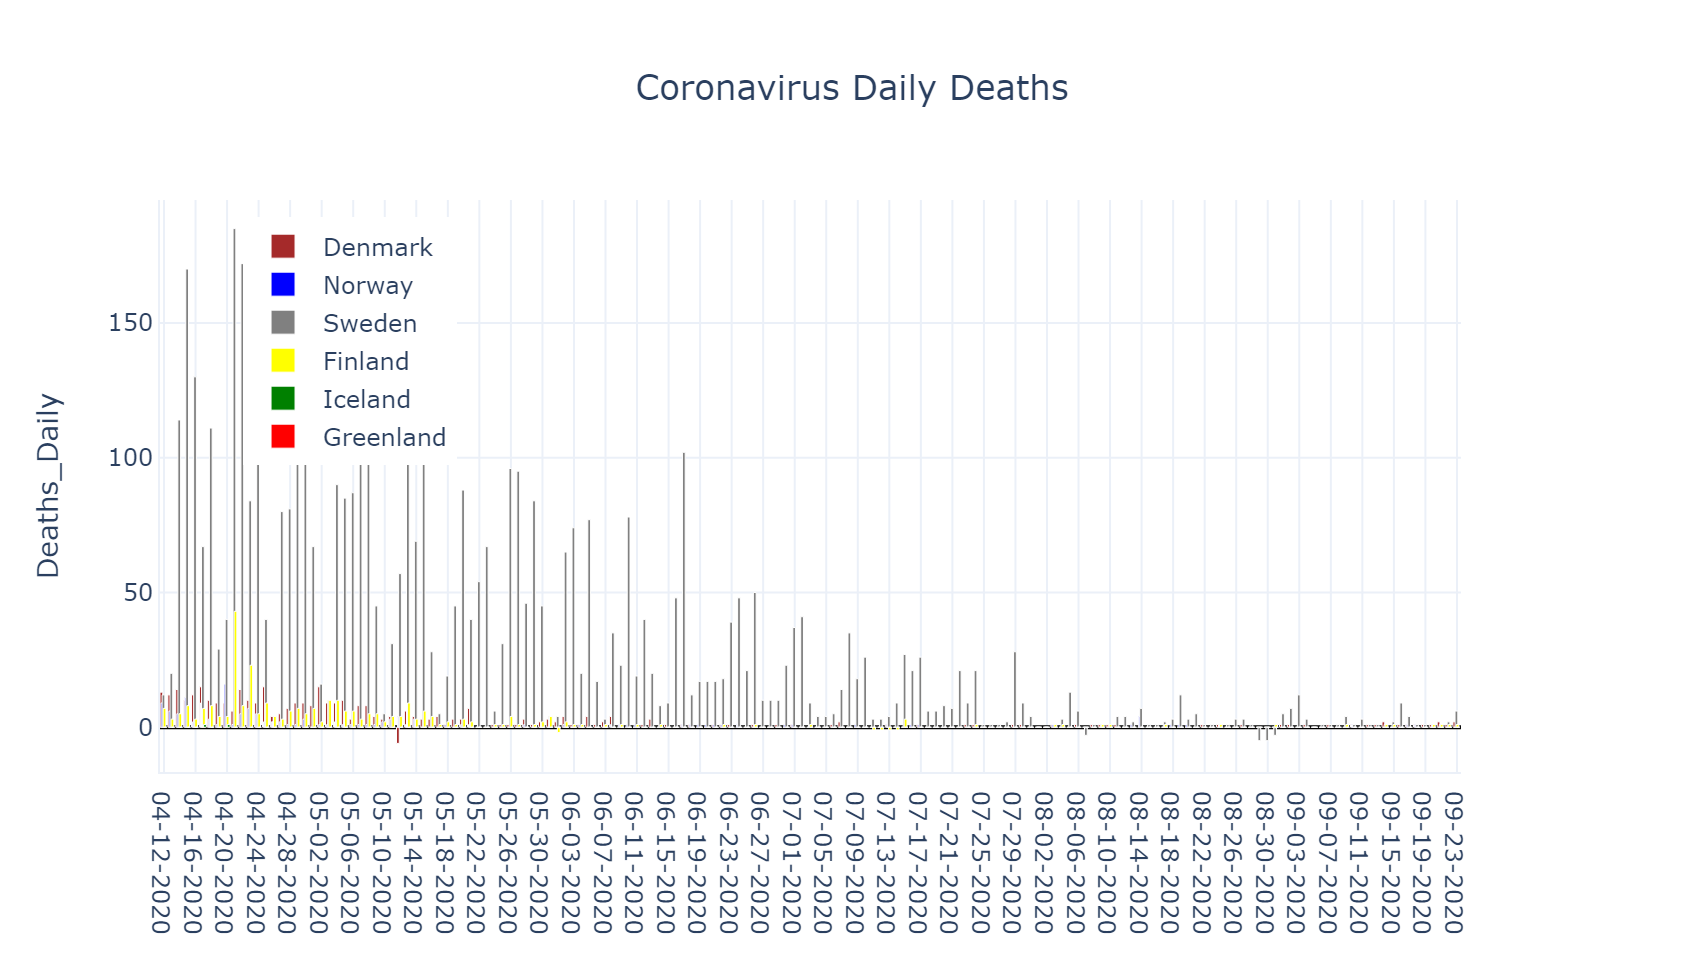

In [13]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
for mycountry in countries_list:
    fig.add_trace(go.Bar(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Deaths_Daily'],
                               name = rename_dict[mycountry],
                               marker = {'color':colors_dict[mycountry]},width = 0.35),
                  secondary_y = False)
fig.update_layout(showlegend = True,
                legend= dict(x=0.06,y=0.97),
                title='Coronavirus Daily Deaths',
                title_x= 0.5,
                yaxis={'title':'Deaths_Daily',
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\7-CV_Daily_Deaths.png'
fig.write_image(myfilename,width = 852,height = 480, scale = 2.0)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


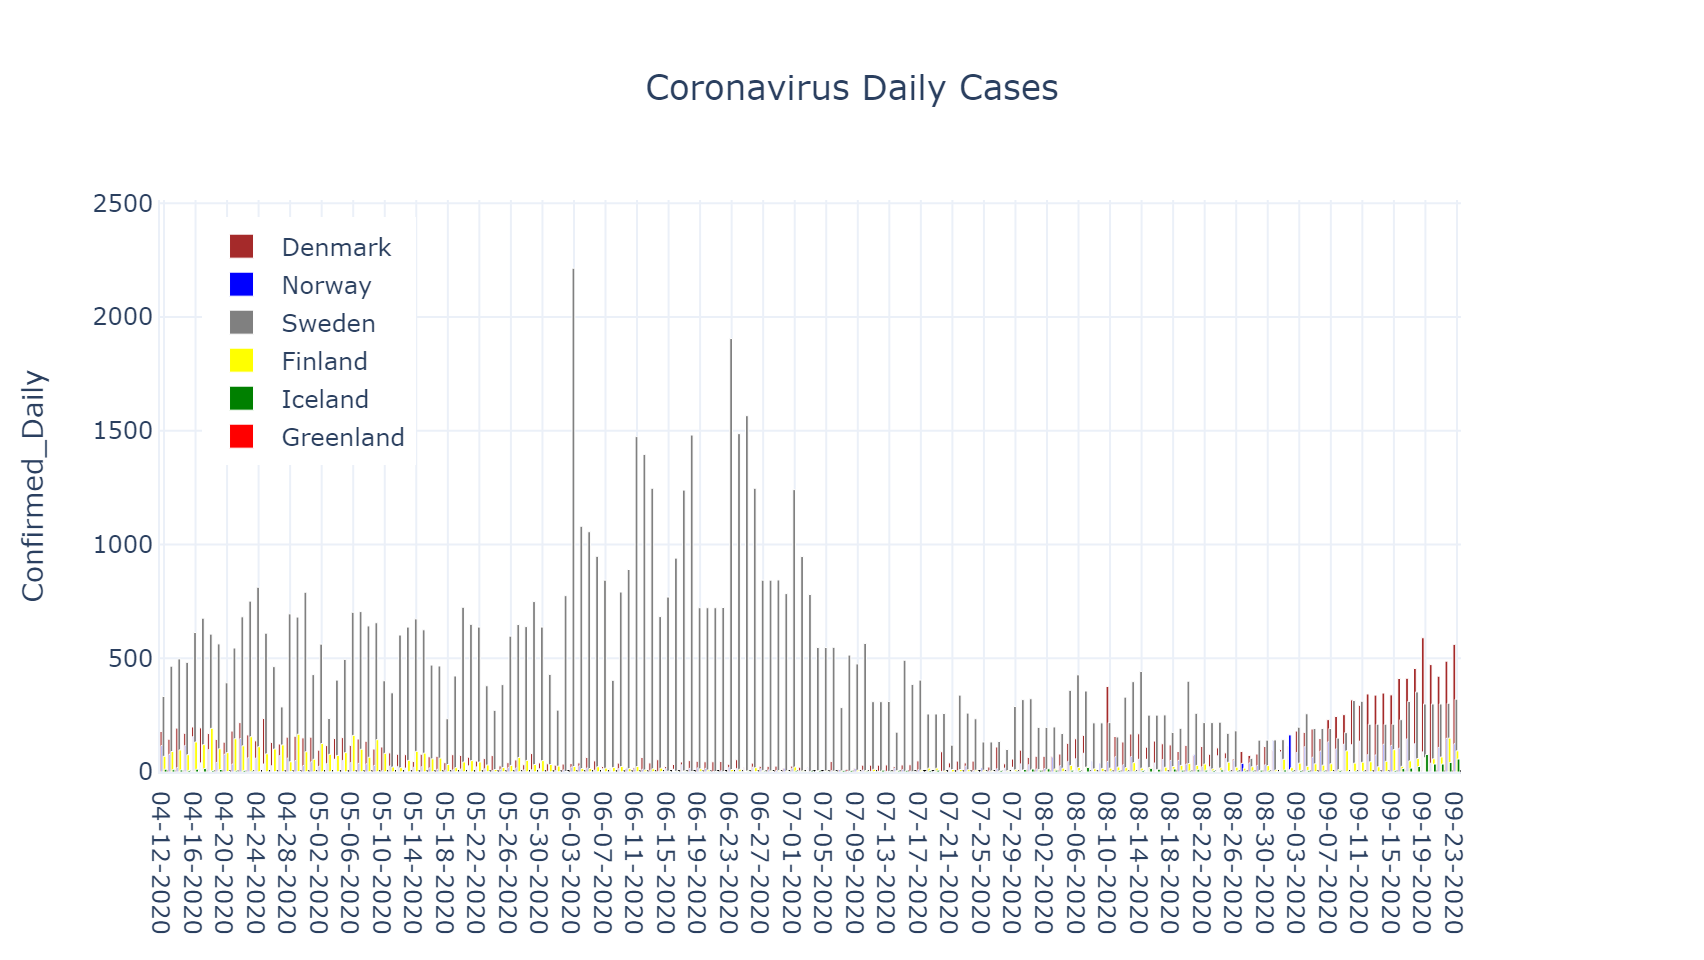

In [19]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
for mycountry in countries_list:
    fig.add_trace(go.Bar(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Confirmed_Daily'],
                               name = rename_dict[mycountry],
                               marker = {'color':colors_dict[mycountry]},width = 0.35),
                  secondary_y = False)

fig.update_layout(showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Daily Cases',
                title_x= 0.5,
                yaxis={'title':'Confirmed_Daily',
                       #long one liner because US data still in dataset
                       'range': [0.0,country_df[country_df['Country_Region'].isin(countries_list)]['Confirmed_Daily'].max() + 300.0],
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')

fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\8-CV_Daily_Cases.png'
fig.write_image(myfilename,width = 852,height = 480, scale = 2.0)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


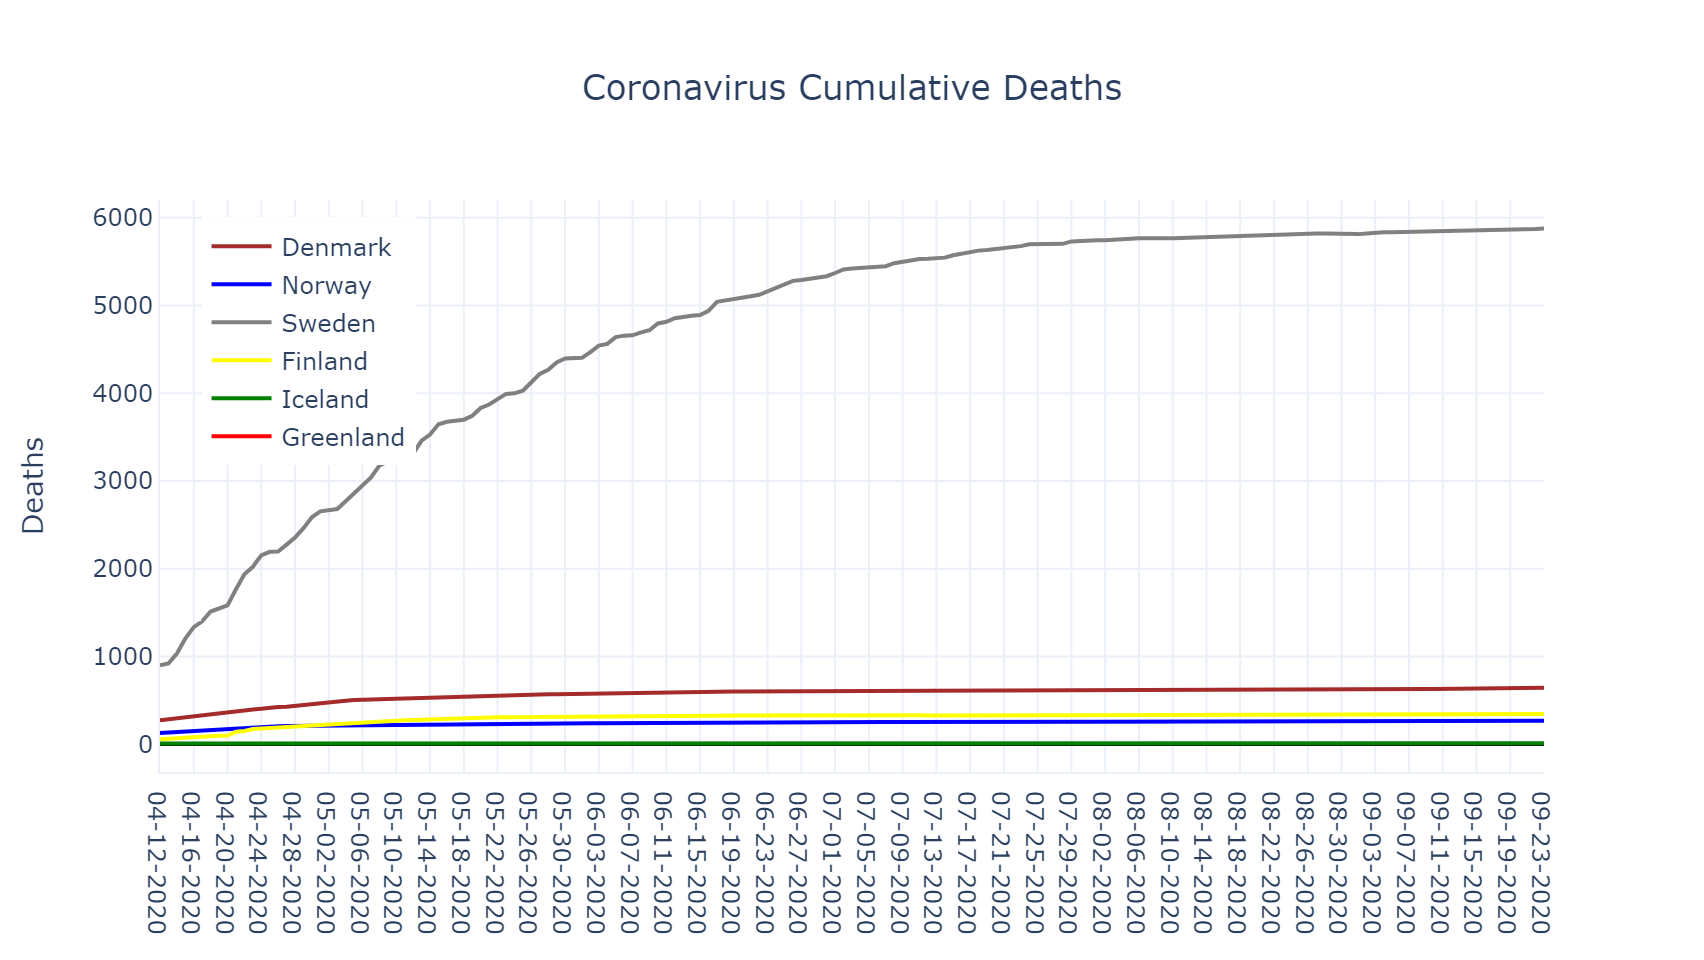

In [15]:
data = []
for mycountry in countries_list:
    data.append(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Deaths'],
                               name = rename_dict[mycountry],
                               line = {'color':colors_dict[mycountry]}))
layout = go.Layout(showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Cumulative Deaths',
                title_x= 0.5,
                yaxis={'title':'Deaths',
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig = go.Figure(data=data,layout=layout)
iplot(fig)
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\9-CV_Cum_Deaths.png'
fig.write_image(myfilename,width = 852,height = 480, scale = 2.0)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


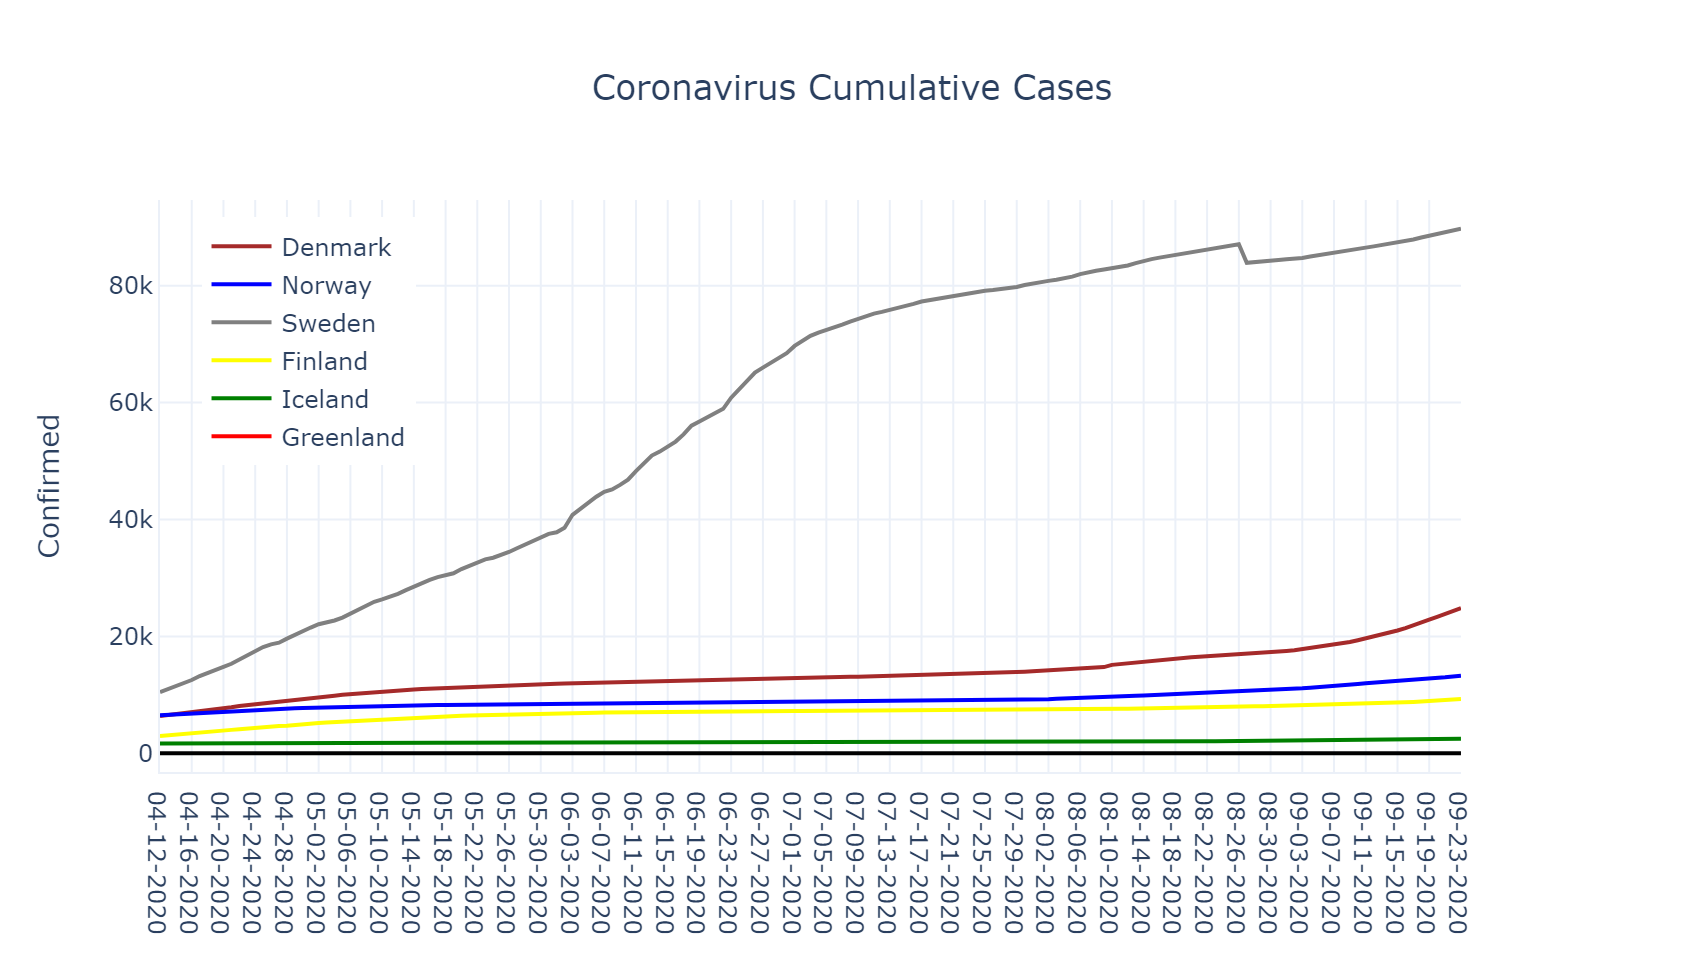

In [18]:
fig = make_subplots(specs=[[{'secondary_y':True}]])
for mycountry in countries_list:
    fig.add_trace(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Confirmed'],
                               name = rename_dict[mycountry],
                               line = {'color':colors_dict[mycountry]}),
                  secondary_y = False)
fig.update_layout(showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Cumulative Cases',
                title_x= 0.5,
                yaxis={'title':'Confirmed',
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig.show()
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\10-CV_Cum-Cases.png'
fig.write_image(myfilename,width = 852,height = 480, scale = 2.0)
print('Static Image:')
Image(filename=myfilename) 

Static Image:


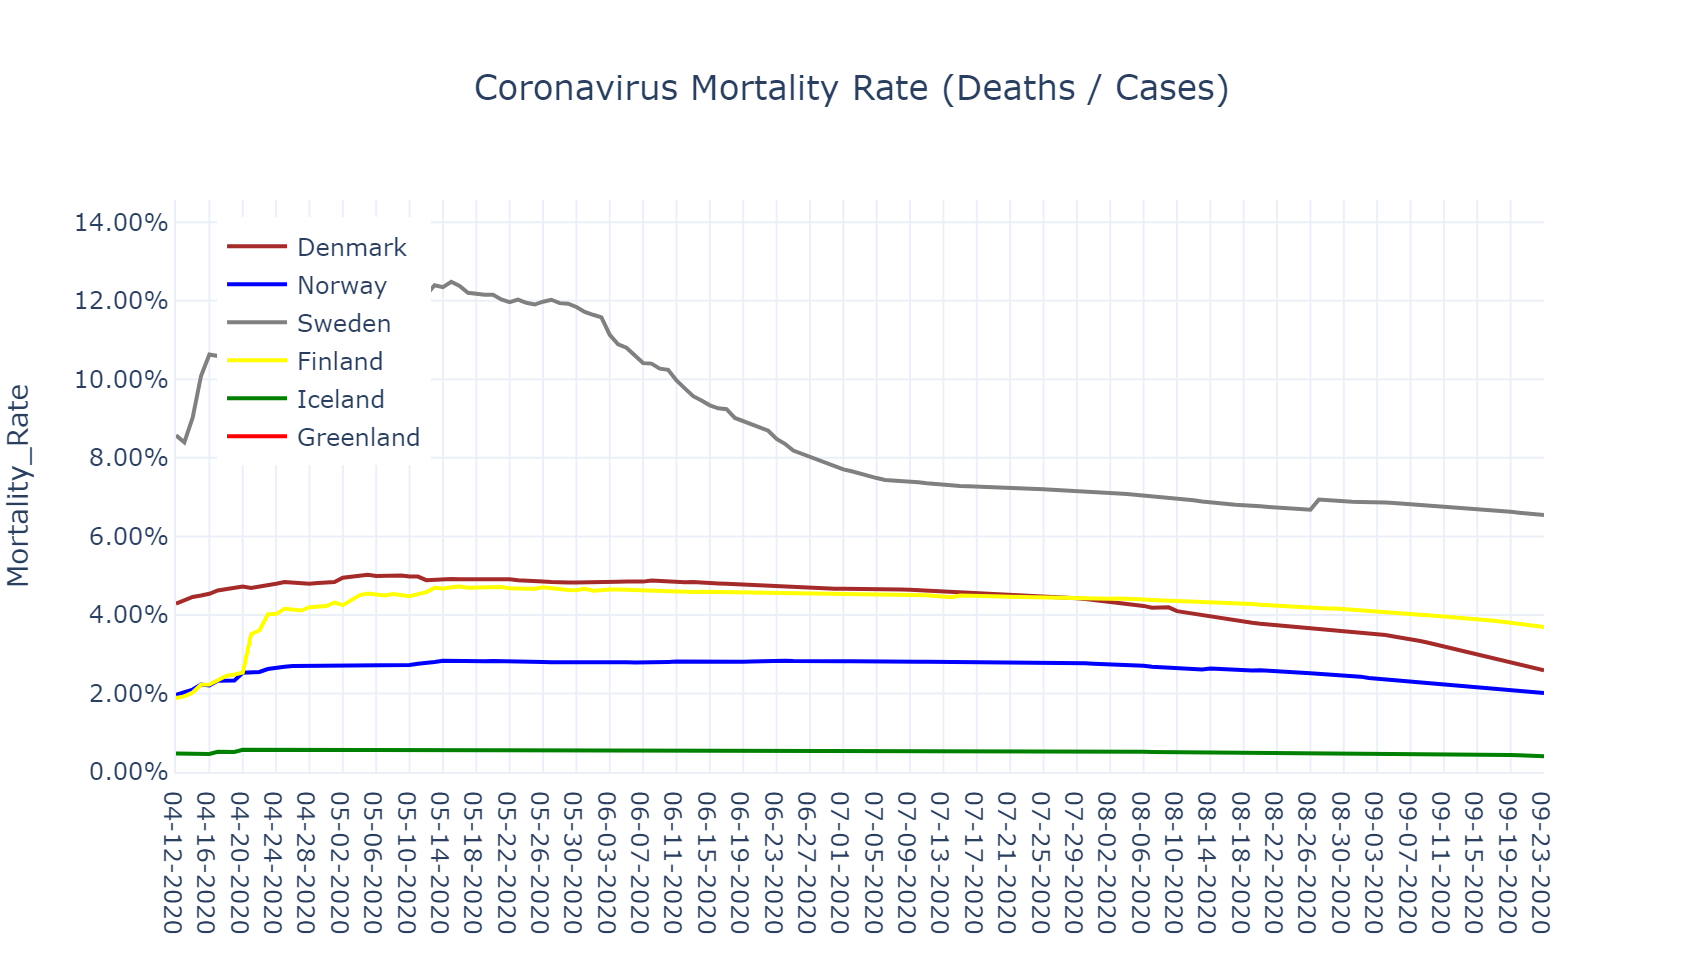

In [17]:
data = []
for mycountry in countries_list:
    data.append(go.Scatter(x=country_df[country_df['Country_Region']==mycountry]['Date'],
                               y=country_df[country_df['Country_Region']==mycountry]['Mortality_Rate'],
                               name = rename_dict[mycountry],
                               line = {'color':colors_dict[mycountry]}))
layout = go.Layout(showlegend = True,
                legend= dict(x=0.03,y=0.97),
                title='Coronavirus Mortality Rate (Deaths / Cases)',
                title_x= 0.5,
                yaxis={'title':'Mortality_Rate',
                       'tickformat':'.2%',
                       'range': [0.0,country_df['Mortality_Rate'].max()+0.02],
                       'zeroline':True,'zerolinecolor':'#000000','zerolinewidth':2.0},
                template='plotly_white')
fig = go.Figure(data=data,layout=layout)
iplot(fig)
myfilename = r'C:\__YOUTUBE__\__POLITICS__\Coronavirus\outputdata\11-CV_Mortality_Rate.png'
fig.write_image(myfilename,width = 852,height = 480, scale = 2.0)
print('Static Image:')
Image(filename=myfilename) 